<a href="https://colab.research.google.com/github/sushirito/ArsenicTemp/blob/main/RawToProcessedConversions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.30MB_AuNP_As(V)Addition



In [ ]:
import pandas as pd

# Load Excel file
file30 = '/content/20250730_UVScans_RawData.xlsx'
xls30 = pd.ExcelFile(file30)

# Select sheets
sheets30 = [s for s in xls30.sheet_names if s.startswith('0.30MB_AuNP') and 'cen' not in s]
as30 = next(s for s in sheets30 if 'As30' in s)
sheets30_unique = [s for s in sheets30 if 'As30' not in s] + [as30]

# Extract and concatenate data
all_data = []
for name in sheets30_unique:
    df = pd.read_excel(xls30, sheet_name=name)
    x = pd.to_numeric(df['Wavelength'], errors='coerce')
    y = pd.to_numeric(df['Abs'], errors='coerce')
    label = '0.30MB_AuNP_As30' if name == as30 else name
    temp_df = pd.DataFrame({'Wavelength': x, label: y})
    all_data.append(temp_df.set_index('Wavelength'))

# Merge on Wavelength
final_df = pd.concat(all_data, axis=1).reset_index()

# Save as CSV
final_df.to_csv('/content/0.30MB_AuNP_Overlay.csv', index=False)


#0.115MB_AuNP_As(V)Addition


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


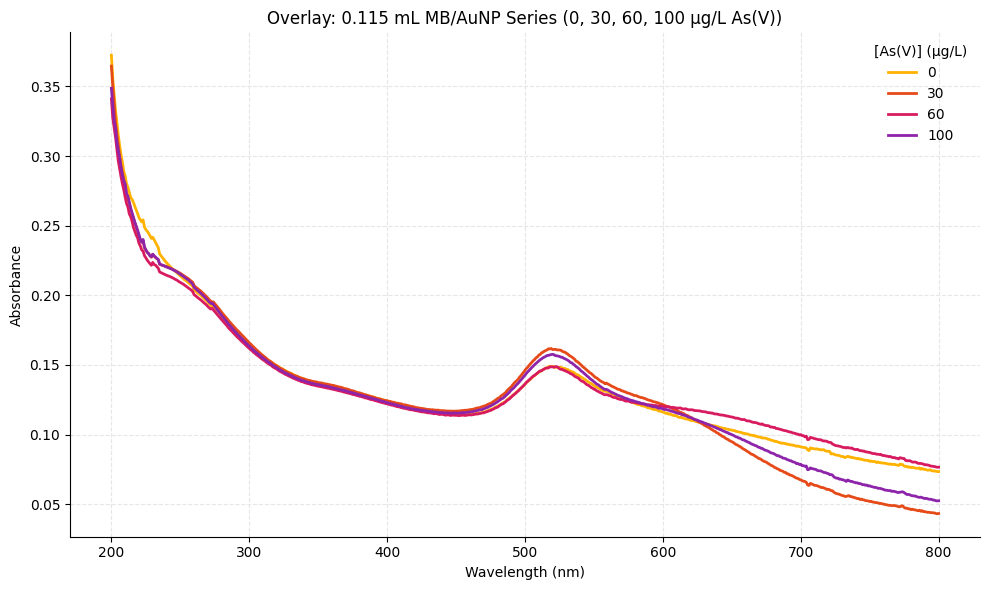

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Prettier plot settings
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': True,
    'grid.color': '0.9',
    'grid.linestyle': '--',
    'grid.linewidth': 0.8,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'lines.linewidth': 2,
    'legend.frameon': False,
    'legend.loc': 'best'
})

# Path to the dataset
file_path = '/content/drive/MyDrive/ArsenicSTS/RawUVVisData/20250730_UVScans_RawData.xlsx'
xls30 = pd.ExcelFile(file_path)

# Map old sheet names to desired labels
sheet_label_map = {
    '0.115MB_AuNP_MQW': '0',
    '0.115MB_AuNP_As30': '30',
    '0.115MB_AuNP_As60': '60',
    '0.115MB_AuNP_As100': '100'
}

# Color palette
palette = ['#FFB300', '#E64A19', '#D81B60', '#8E24AA']

# Plot and collect data
merged_data = None
plt.figure()
for (sheet, label), color in zip(sheet_label_map.items(), palette):
    df = pd.read_excel(xls30, sheet_name=sheet)
    x = pd.to_numeric(df['Wavelength'], errors='coerce')
    y = pd.to_numeric(df['Abs'], errors='coerce')
    plt.plot(x, y, color=color, label=label)

    temp_df = pd.DataFrame({'Wavelength': x, label: y}).set_index('Wavelength')
    if merged_data is None:
        merged_data = temp_df
    else:
        merged_data = merged_data.join(temp_df, how='outer')

# Reset index to save Wavelength as a column
final_df = merged_data.reset_index()

# Save to CSV
output_path = '/content/drive/MyDrive/ArsenicSTS/UVVisData/0.115MB_AuNP_As.csv'
final_df.to_csv(output_path, index=False)

# Show plot
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Overlay: 0.115 mL MB/AuNP Series (0, 30, 60, 100 µg/L As(V))')
plt.legend(title='[As(V)] (µg/L)')
plt.tight_layout()
plt.show()